# TASK 2

In [9]:
#Importing required libraries
import os
import gensim
import multiprocessing
import itertools
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk

In [10]:
#get distance words in between in the same cluster
def distance(listOfWords): #model.wv.vocab is global 
    num=len(listOfWords)
   
    score=0
    for comb in itertools.combinations(listOfWords, 2):
        #print(nltk.edit_distance(comb[0], comb[1]))
        score=score+nltk.edit_distance(comb[0], comb[1])
    
    return score

def find(search_NUM ): #dictonary is global value
    temp=[]
    for word, clusterNum in dictionary.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
        if clusterNum == search_NUM:
            temp.append(word)
    return temp # words in cluster depending on search_NUM

In [11]:
#Loading the dataset
with open(r'C:\Users\Ronisha Basker\Downloads\training_data.txt',encoding="utf-8",errors="ignore") as f:
    training = f.read()

In [12]:
%%time
#Performing basic pre processing
def read_input(input_file):
    #with open (input_file, 'rb') as f:
    with open(r'C:\Users\Ronisha Basker\Downloads\training_data.txt',encoding="utf-8",errors="ignore") as f:
         for i, line in enumerate (f):    
            #if (i%10000==0):
            #    logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            #Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long
            yield gensim.utils.simple_preprocess (line)
 
# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (training))
#logging.info ("Done reading data file")
#5

Wall time: 2.81 s


In [13]:
documents[0:1000]

[['definitely', 'brother', 'lockdown', 'housepay'],
 ['amp',
  'ca',
  'presents',
  'co',
  'vid',
  'based',
  'online',
  'tambo',
  'la',
  'ho',
  'us',
  'ie',
  'price',
  'rs',
  'per',
  'ticket',
  'rs',
  'contributed',
  'co',
  'vid',
  'relief',
  'fund',
  'date',
  'april',
  'pm',
  'rules',
  'cat',
  'ca',
  'member',
  'family',
  'persons',
  'allowed'],
 ['condolences',
  'family',
  'lost',
  'love',
  'one',
  'pandemic',
  'may',
  'god',
  'ease',
  'pain',
  'give',
  'peace',
  'comfo',
  'need'],
 ['president',
  'keeps',
  'talking',
  'much',
  'spend',
  'spend',
  'nearly',
  'much',
  'golf',
  'trips',
  'family',
  'business',
  'trips'],
 ['nobody',
  'recognize',
  'paradox',
  'rep',
  'ucl',
  'could',
  'ask',
  'question',
  'turkey',
  'brother',
  'helped',
  'fighting',
  'virus',
  'heard',
  'sent',
  'request',
  'get',
  'help',
  'dont',
  'worry',
  'turks',
  'always',
  'help',
  'people',
  'weak',
  'us'],
 ['father', 'older', 'er'

## Getting embeddings

In [14]:
%%time
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(documents,
                    min_count=25, #model ingnores words that do not meet
                     window=29,    #maximum distance between
                     size=300, #do size as well
                     sample=6e-5,  #threshold for figurin which higher frequency words are randomly down sampled
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
#6

Wall time: 26.4 s


In [15]:
#7
print (list(w2v_model.wv.vocab))

['definitely', 'brother', 'lockdown', 'amp', 'ca', 'co', 'vid', 'based', 'online', 'la', 'ho', 'us', 'ie', 'price', 'rs', 'per', 'ticket', 'relief', 'fund', 'date', 'april', 'pm', 'rules', 'cat', 'member', 'family', 'persons', 'allowed', 'condolences', 'lost', 'love', 'one', 'pandemic', 'may', 'god', 'ease', 'pain', 'give', 'peace', 'comfo', 'need', 'president', 'keeps', 'talking', 'much', 'spend', 'nearly', 'golf', 'trips', 'business', 'nobody', 'recognize', 'rep', 'ucl', 'could', 'ask', 'question', 'turkey', 'helped', 'fighting', 'virus', 'heard', 'sent', 'request', 'get', 'help', 'dont', 'worry', 'always', 'people', 'weak', 'father', 'older', 'er', 'mother', 'healthcare', 'life', 'doctor', 'helping', 'fight', 'respect', 'workers', 'appreciate', 'salute', 'ee', 'tonight', 'officially', 'launching', 'way', 'things', 'putting', 'thing', 'nice', 'ready', 'sta', 'delivering', 'goodtimes', 'heres', 'shots', 'hit', 'sister', 'venue', 'back', 'absolutely', 'loved', 'watching', 'lifetime', '

In [16]:
#9
print (len(list(w2v_model.wv.vocab)))

5800


In [17]:
#10
X=w2v_model[w2v_model.wv.vocab]

E:\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [18]:
#Setting number of clusters to 100
NUM_CLUSTER=100

In [19]:
kcluster = KMeansClusterer(NUM_CLUSTER,distance=nltk.cluster.util.cosine_distance, repeats=10)

In [22]:
%%time
assgined_clusters=kcluster.cluster(X,assign_clusters=True)

Wall time: 29min 37s


In [23]:
#words in ecah cluster 
a= list(w2v_model.wv.vocab)
b = assgined_clusters
dictionary = dict(zip(a, b))

In [25]:
%%time
total_score=[]

num=100 #total number of clustering

for i in range(num): 
    score=0
    words = find(i) #
    score=distance(words)
    total_score.append(score)
  
total_distance = sorted(zip(total_score,range(num)), reverse=False)[:10]
#print(total_distance)

best_cluster_num=[]



#print best clustering's words
for i in range(10): #topten
    best_cluster_num.append(total_distance[i][1])
    temp = total_distance[i][1]
    print(temp,"-th cluster's word",find(temp))



32 -th cluster's word ['called', 'se', 'film', 'changed', 'anymore', 'gas', 'diy', 'lit', 'pk', 'lucky', 'clap', 'opinion', 'timing', 'criticising', 'guessing', 'expressing']
81 -th cluster's word ['rules', 'er', 'feet', 'death', 'store', 'reality', 'fair', 'maga', 'ju', 'nu', 'fam', 'op', 'hearing', 'burning', 'sentence', 'deserved', 'sudan', 'sentenced', 'crackhead', 'polling']
44 -th cluster's word ['respect', 'want', 'shes', 'idea', 'asked', 'child', 'dear', 'die', 'alone', 'sick', 'wife', 'checked', 'willing', 'gasping', 'breath', 'parents', 'either', 'merseyside', 'grade', 'bias', 'perceived', 'suffer', 'neglected']
91 -th cluster's word ['online', 'working', 'ill', 'well', 'go', 'house', 'make', 'normal', 'mom', 'walma', 'bought', 'pissed', 'yesterday', 'dad', 'needs', 'write', 'phone', 'cleaning', 'cbd', 'helps', 'leaves', 'switch', 'amazed', 'disappears', 'ether']
84 -th cluster's word ['fund', 'every', 'owned', 'continue', 'biz', 'seeds', 'household', 'foune', 'run', 'powerfu

In [27]:
from sklearn import cluster

In [29]:
from matplotlib import pyplot as plt

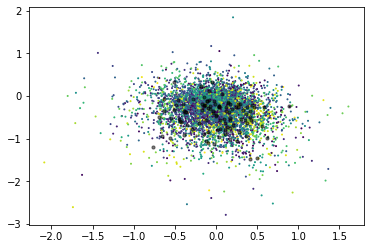

In [31]:
kmeans = cluster.KMeans(n_clusters=100)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=1, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=10, alpha=0.5);